In [236]:
# !pip install --upgrade google-api-python-client
# !pip install calplot

In [237]:
from googleapiclient.discovery import build
import re
from datetime import datetime
import pandas as pd
import calplot

In [238]:
# Replace with your API key from Google Cloud Platform
api_key = 'Your_API_Key'
youtube = build('youtube', 'v3', developerKey=api_key)

In [239]:
# Find the channel ID of Zy0x Archives
search_response = youtube.search().list(
    q='Zy0xArchives',
    part='snippet',
    type='channel',
    maxResults=1
).execute()

if search_response['items']:
    channel_id = search_response['items'][0]['id']['channelId']
    print(f"Channel ID: {channel_id}")
else:
    print("Channel not found")

Channel ID: UCvoz_JCPK2XePUoLjHsg1PQ


In [240]:
channel_id = 'UCvoz_JCPK2XePUoLjHsg1PQ'

# First, get the channel's upload playlist ID
channel_response = youtube.channels().list(
    id=channel_id, 
    part='contentDetails'
).execute()

uploads_playlist_id = channel_response['items'][0]['contentDetails']['relatedPlaylists']['uploads']

# Then, retrieve videos from the upload playlist, including title and upload date
video_details = []

next_page_token = None
while True:
    playlistitems_response = youtube.playlistItems().list(
        playlistId=uploads_playlist_id,
        part='snippet',
        maxResults=50,  # Adjust based on your needs, up to a maximum of 50
        pageToken=next_page_token
    ).execute()
    
    for item in playlistitems_response['items']:
        title = item['snippet']['title']
        upload_date = item['snippet']['publishedAt']  # ISO 8601 format
        video_details.append((title, upload_date))
    
    next_page_token = playlistitems_response.get('nextPageToken')
    if next_page_token is None:
        break

# Print or process the list of tuples containing video titles and their upload dates
for detail in video_details:
    print(detail)

('Zy0x VOD: Feb 18, 2024 - Trying Out Wuthering Waves Closed Beta Test 2', '2024-02-19T16:08:16Z')
('Zy0x Archive/VOD: Jan 17, 2024 - Dr. Ratio Release, Testing Him Out On MoC And SU: Gold and Gears', '2024-02-19T16:06:22Z')
('Zy0x VOD: Feb 14, 2024 - 5* Character Pull Value Tierlist, Abyss Testing, Lantern Rite Minigames', '2024-02-14T15:41:12Z')
('Zy0x VOD: Feb 12, 2024 - Viewer Abyss Runs Review: Part 2, Exploring, Artifact Farming, Reacts', '2024-02-12T16:55:26Z')
('Zy0x VOD: Feb 8, 2024 - Finishing The HSR 2.0 Penacony Trailblaze Mission, Abyss Testing', '2024-02-09T16:05:31Z')
('Zy0x VOD: Feb 5, 2024 - HSR 2.0 And Penacony Release, Black Swan & Misha Pulls, Testing Them Out', '2024-02-06T14:06:59Z')
('Zy0x VOD: Feb 5, 2024 - Playing Granblue Fantasy: Relink, Genshin Grinding Before HSR 2.0', '2024-02-05T14:50:23Z')
('Zy0x VOD: Feb 4, 2024 - Artifact Farming & Strongboxing, Abyss Testing, Exploring', '2024-02-04T14:09:00Z')
('Zy0x VOD: Feb 1, 2024 - New Genshin 4.4 Abyss, Testing 

In [241]:
len(video_details)

119

In [242]:
# Updated RegEx pattern to match dates, including "June" and "July"
date_pattern = r'\b(Jan|Feb|Mar|Apr|May|Jun|June|Jul|July|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4}\b'

# List to hold all the exact dates found from video titles
dates = []
# List to hold upload dates of videos whose titles did not contain a date
missing_dates = []

# Iterate over each video title and search for dates using the RegEx pattern
for tup in video_details:
    title = tup[0]
    match = re.search(date_pattern, title)
    # Extract and append the date if a match is found
    if match:
        extracted_date = match.group()
        dates.append(extracted_date)
    else:
        print("No date found in the following string:")
        print(title)
        print("-----------------------------------------------------------------------------------")
        # Add the upload date to a separate list if no date is in the title
        missing_dates.append(tup[1])

# Print the list of exact dates
print(dates)

No date found in the following string:
Zy0x's Offline Chat Reacts To The Genshin Impact 2023 Concert: "Melodies of an Endless Journey"
-----------------------------------------------------------------------------------
No date found in the following string:
Zy0x Does Quests - The Fontaine Archon Quest Supercut
-----------------------------------------------------------------------------------
No date found in the following string:
Zy0x Does Quests - Scaramouche Story Quest: Part 2
-----------------------------------------------------------------------------------
No date found in the following string:
Zy0x Does Quests - Scaramouche Story Quest: Part 1
-----------------------------------------------------------------------------------
No date found in the following string:
Zy0x Does Quests - The Sumeru Archon Quest: Act 6 - Caribert
-----------------------------------------------------------------------------------
No date found in the following string:
Zy0x Does Quests - Lantern Rite 2

In [243]:
dates

['Feb 18, 2024',
 'Jan 17, 2024',
 'Feb 14, 2024',
 'Feb 12, 2024',
 'Feb 8, 2024',
 'Feb 5, 2024',
 'Feb 5, 2024',
 'Feb 4, 2024',
 'Feb 1, 2024',
 'Jan 31, 2024',
 'Jan 30, 2024',
 'Jan 28, 2024',
 'Jan 26, 2024',
 'Jan 24, 2024',
 'Jan 21, 2024',
 'Jan 20, 2024',
 'Jan 19, 2024',
 'Jan 17, 2024',
 'Jan 11, 2024',
 'Jan 9, 2024',
 'Jan 8, 2024',
 'Jan 6, 2024',
 'Jan 1, 2024',
 'Dec 31, 2023',
 'Dec 26, 2023',
 'Dec 22, 2023',
 'Dec 19, 2023',
 'Dec 15, 2023',
 'Dec 15, 2023',
 'Dec 14, 2023',
 'Dec 10, 2023',
 'Dec 8, 2023',
 'Dec 6, 2023',
 'Dec 5, 2023',
 'Dec 1, 2023',
 'Nov 27, 2023',
 'Nov 25, 2023',
 'Nov 23, 2023',
 'Nov 18, 2023',
 'Nov 17, 2023',
 'Nov 14, 2023',
 'Nov 11, 2023',
 'Nov 7, 2023',
 'Nov 3, 2023',
 'Nov 3, 2023',
 'Nov 2, 2023',
 'Oct 30, 2023',
 'Oct 27, 2023',
 'Oct 26, 2023',
 'Oct 23, 2023',
 'Oct 22, 2023',
 'Oct 18, 2023',
 'Oct 17, 2023',
 'Oct 10, 2023',
 'Oct 9, 2023',
 'Oct 6, 2023',
 'Oct 2, 2023',
 'Oct 2, 2023',
 'Sep 30, 2023',
 'Sep 29, 2023',
 

In [244]:
len(dates)

110

In [245]:
missing_dates

['2023-12-22T14:47:18Z',
 '2023-12-20T17:07:30Z',
 '2023-07-14T08:05:03Z',
 '2023-07-14T05:18:43Z',
 '2023-07-13T16:05:26Z',
 '2023-07-12T20:17:00Z',
 '2023-07-12T20:16:46Z',
 '2023-07-12T12:12:51Z',
 '2023-07-10T14:16:45Z']

In [246]:
len(missing_dates)

9

In [247]:
# We need this function to convert the date strings to datetimes, because Zy0xArchives was not really consistent with their month-naming conventions.
# They sometimes used the abbreviated form of a month, and other times they used the full name of the month.
def parse_date(date_str):
    for fmt in ("%b %d, %Y", "%B %d, %Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Date format for '{date_str}' is not supported.")

In [248]:
# Convert date strings to datetime objects
datetimes = [parse_date(date) for date in dates]
datetimes

[datetime.datetime(2024, 2, 18, 0, 0),
 datetime.datetime(2024, 1, 17, 0, 0),
 datetime.datetime(2024, 2, 14, 0, 0),
 datetime.datetime(2024, 2, 12, 0, 0),
 datetime.datetime(2024, 2, 8, 0, 0),
 datetime.datetime(2024, 2, 5, 0, 0),
 datetime.datetime(2024, 2, 5, 0, 0),
 datetime.datetime(2024, 2, 4, 0, 0),
 datetime.datetime(2024, 2, 1, 0, 0),
 datetime.datetime(2024, 1, 31, 0, 0),
 datetime.datetime(2024, 1, 30, 0, 0),
 datetime.datetime(2024, 1, 28, 0, 0),
 datetime.datetime(2024, 1, 26, 0, 0),
 datetime.datetime(2024, 1, 24, 0, 0),
 datetime.datetime(2024, 1, 21, 0, 0),
 datetime.datetime(2024, 1, 20, 0, 0),
 datetime.datetime(2024, 1, 19, 0, 0),
 datetime.datetime(2024, 1, 17, 0, 0),
 datetime.datetime(2024, 1, 11, 0, 0),
 datetime.datetime(2024, 1, 9, 0, 0),
 datetime.datetime(2024, 1, 8, 0, 0),
 datetime.datetime(2024, 1, 6, 0, 0),
 datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2023, 12, 31, 0, 0),
 datetime.datetime(2023, 12, 26, 0, 0),
 datetime.datetime(2023, 12, 22,

In [249]:
# Convert ISO 8601 strings to datetime objects, stripping the 'Z' (for UTC)
missing_datetimes = [datetime.fromisoformat(date_str.rstrip('Z')) for date_str in missing_dates]
missing_datetimes

[datetime.datetime(2023, 12, 22, 14, 47, 18),
 datetime.datetime(2023, 12, 20, 17, 7, 30),
 datetime.datetime(2023, 7, 14, 8, 5, 3),
 datetime.datetime(2023, 7, 14, 5, 18, 43),
 datetime.datetime(2023, 7, 13, 16, 5, 26),
 datetime.datetime(2023, 7, 12, 20, 17),
 datetime.datetime(2023, 7, 12, 20, 16, 46),
 datetime.datetime(2023, 7, 12, 12, 12, 51),
 datetime.datetime(2023, 7, 10, 14, 16, 45)]

# First let's do the calculation using just the dates from titles

In [250]:
# Sort the dates in case they are not in order
datetimes.sort()

# Calculate the differences (in days) between consecutive dates
differences = [(datetimes[i + 1] - datetimes[i]).days for i in range(len(datetimes) - 1)]

# Calculate the average difference
average_difference = sum(differences) / len(differences) if differences else 0

print(f"Average number of days between consecutive dates: {average_difference}")

Average number of days between consecutive dates: 2.458715596330275


# Now let's do the calculation by adding in the upload dates of videos whose titles did not contain a date

In [251]:
# Combine all dates, then perform calculation
all_datetimes = datetimes + missing_datetimes

# Sort the dates in case they are not in order
all_datetimes.sort()

# Calculate the differences (in days) between consecutive dates
differences = [(all_datetimes[i + 1] - all_datetimes[i]).days for i in range(len(all_datetimes) - 1)]

# Calculate the average difference
average_difference = sum(differences) / len(differences) if differences else 0

print(f"Average number of days between consecutive dates: {average_difference}")

Average number of days between consecutive dates: 2.2203389830508473


# Let's do some visualization

(<Figure size 1000x340 with 2 Axes>,
 array([<AxesSubplot:ylabel='2023'>, <AxesSubplot:ylabel='2024'>],
       dtype=object))

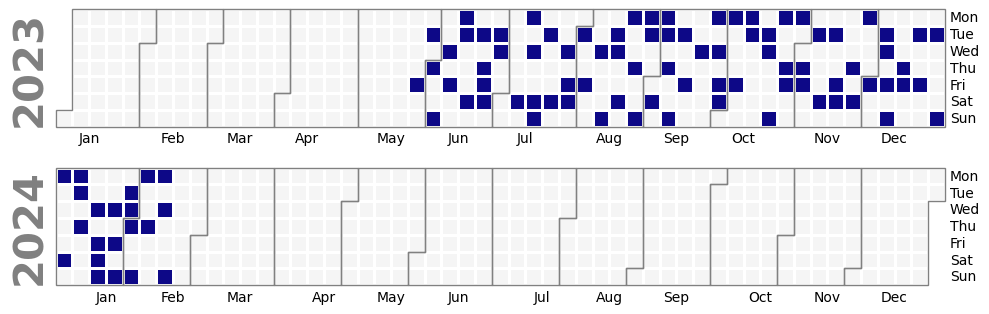

In [252]:
# List of datetime objects you want to mark; here we are just using dates from titles, but you could also add in the upload dates from videos whose titles did not have a date
dates_to_mark = datetimes

# Create a date range for the year, for example
date_range = pd.date_range(start='2023-01-01', end='2024-12-31')

# Create a Pandas Series with the date range as the index and all values set to 0
data = pd.Series(0, index=date_range)

# Mark the specific dates by setting their value to 1 (or any positive number)
for date in dates_to_mark:
    if date in data.index:
        data[date] = 1

# Use calplot to plot the data; days with value > 0 will be highlighted
calplot.calplot(data, cmap='plasma', colorbar=False)